# Final Exercise - Discrete dynamics, maps and symplectic integrators (Why to use them)

# Exercise

### Compute the fixed points and the stability for Logistic map

If a point is locally stable, then some iterations would be needed to reach it. Those iterations are called the transient.

The set of local initial conditions which reach the same limit fixed point is called the basin of attraction of the fixed point. They can have a very complicated geometry.

In [1]:
import numpy as np
import matplotlib.pylab as plt

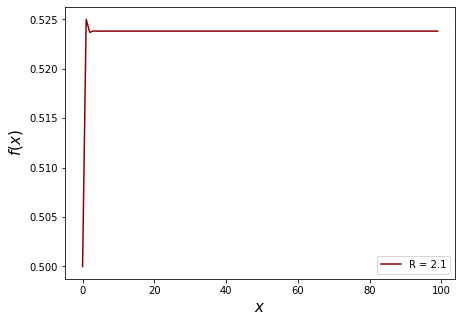

In [2]:
data = np.genfromtxt('datos.txt')

fig0 = plt.figure(figsize = (7,5))
ax = fig0.add_subplot(111)
ax.plot(data[:,0], data[:,1], 'darkred', label = 'R = 2.1')
ax.set_xlabel('$x$', size = 15)
ax.set_ylabel('$f(x)$', size = 15)
plt.legend(loc = 'lower right')
plt.show()

Gráfica de los datos generados en C++ para el mapa logístico, con R = 2.1 y f(x) inicial de 0.5. Se compiló el archivo LogisticMap.cpp en la terminal y se ejecutó ./a.out > datos.txt.

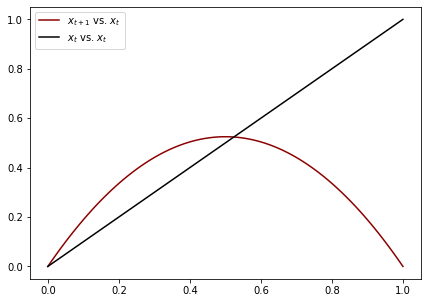

In [3]:
def Logistic_map(x,R0):
    return R0*x*(1-x)

x_t = np.linspace(0,1,100)
R = 2.1
Map = Logistic_map(x_t, R)

fig1 = plt.figure(figsize = (7,5))
ax = fig1.add_subplot(111)
ax.plot(x_t, Map, 'darkred', label = '$x_{t+1}$ vs. $x_t$')
ax.plot(x_t, x_t, 'black', label = '$x_t$ vs. $x_t$')
plt.legend(loc = 'best')
plt.show()

Se graficó $x_{t+1}$ en función de $x_t$, lo que permite evaluar si la función tiene fixed points. Estos últimos corresponden a la intersección y la gráfica de $x_t$ vs $x_t$. En consecuencia, sabemos que existen dos fixed points para el Mapa Logístico.  

A continuación, hallamos dichos fixed points comparando punto a punto ambas funciones. Así buscamos dos puntos cuya diferencia fuese menor a 0.002, esto debido a que dados los resultados no existian dos puntos cuyas cifras significativas coincidieran en su totalidad.

In [7]:
fixed_points = []

for i in range (100):
    if(np.abs(Map[i] - x_t[i]) < 0.002):
        fixed_points.append(Map[i])

print('Los dos fixed points para el Mapa Logístico con R = 2.1 son:' , fixed_points)

Los dos fixed points para el Mapa Logístico con R = 2.1 son: [0.0, 0.5236608509335783]


Una vez hemos hallado el valor de los fixed points, procedemos a analizar la estabilidad de éstos. En este caso, podremos concluir cuál de los dos es un punto estable debido a que la iteración de la misma función para diferentes condiciones iniciales convergerá siempre a un mismo punto.

In [9]:
indices = np.zeros((100,1))
maps = np.zeros((100,10))
x_0 = 0.1

for i in range (0,10):
    maps[0,i] = x_0
    
    for k in range (1,100):
        maps[k,i] = Logistic_map(maps[k-1,i],R)
        indices[k] = k
    
    x_0 += 0.1

Para comprobar la estibilidad de los fixed usamos 10 coondiciones iniciales diferentes, la cuales variarion entre 0 y 1. En cada caso, iteramos 100 veces y graficamos con el fin de verificar si convergian a 0 o a 0.5236.

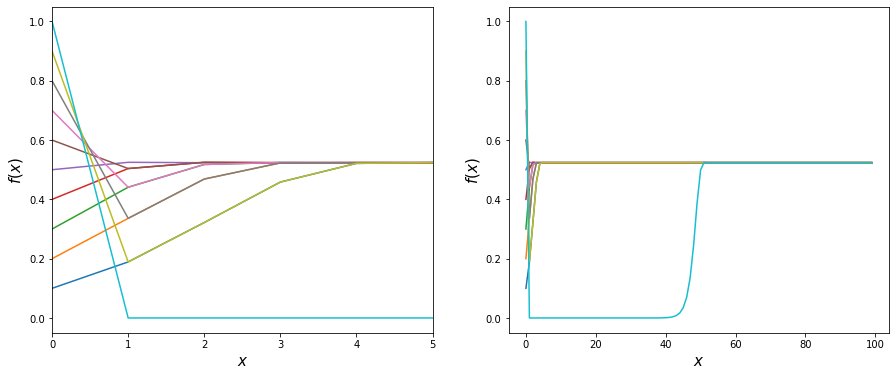

In [19]:
fig2 = plt.figure(figsize = (15,6))
ax0 = fig2.add_subplot(122)
ax1 = fig2.add_subplot(121)

for j in range (0,10):
    ax0.plot(indices, maps[:,j])
    ax1.plot(indices, maps[:,j])

plt.xlim(0,5)
ax0.set_xlabel('$x$', size = 15)
ax0.set_ylabel('$f(x)$', size = 15)


ax1.set_xlabel('$x$', size = 15)
ax1.set_ylabel('$f(x)$', size = 15)

plt.show()

A primera vista, la mayoría de los puntos convergen a 0.5236, esto es lo que podemos inferir de la primera gráfca. Sin embargo, al permitir una vista completa de las iteraciones, como lo podemos observar en la segunda figura, verificamos que en efecto la función converge a un mismo valor sin importar el f(x) inicial. No obtante, también podemos concluir que a mayor valor de f(x) inicial, decrece de forma más pronunciada y requiere de un mayor número de iteraciones para que su evolución se ajuste a lo esperado.

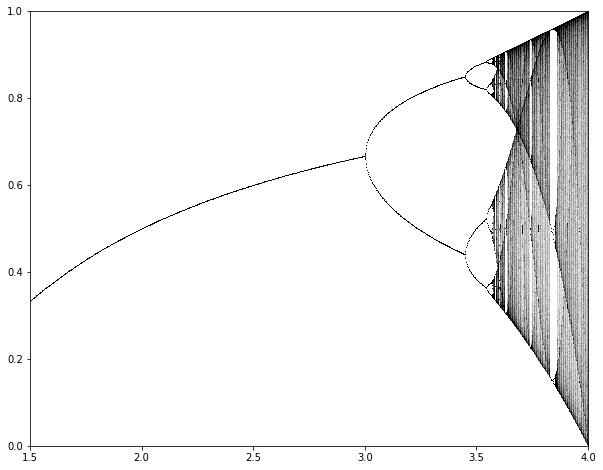

In [20]:
plt.figure(figsize=(10,8))
for L in np.linspace(1,4,1000):
    x=np.linspace(0.0001,1,10000)
    for i in range(1000):
        x=Logistic_map(x,L)
    plt.plot([L]*len(x),x,".",markersize=0.01,color="k")
    plt.ylim(0,1)
    plt.xlim(1.5,4)
plt.show()

## Nota importante: 

1. El trabajo fue realizado por Sebastian Mauricio Morelli Moreno (201713926) y Marysabel Mejia Polania (201713780).
2. El Jupyter Notebook se encuentra en ambos repositorios dado que tuvimos problemas con los permisos de colaboración entre los usuarios de GitHub. Así mismo, algunos de los commits no fueron realizados desde la terminal por problemas de la misma índole.